### 2005 - 01 - 01 ~ 2023- 01- 24

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

## 데이터 확인

In [2]:
all_ = pd.read_csv('지표.csv')
all_

,날짜,시간,국가,경제지표,실제,예상,이전,중요도
0,01.20 (Fri),16:00,gb,월간 소매 판매 Dec,-1%,0.5%,-0.5%,상
1,01.20 (Fri),09:01,gb,GFK 소비자 신뢰지수 Jan,-45,-40,-42,상
2,01.19 (Thu),22:30,us,건축 허가 사전 Dec,1.33M,1.37M,1.351M,상
3,01.18 (Wed),22:30,us,월간 소매 판매 Dec,-1.1%,-0.8%,-1%,상
4,01.18 (Wed),22:30,us,생산자물가지수 (MoM) Dec,-0.5%,-0.1%,0.2%,상
...,...,...,...,...,...,...,...,...
3286,01.07 (Wed),22:15,us,ADP 고용변화 May,241K,226K,227K(R),상
3287,01.07 (Wed),00:00,us,ISM 비제조업 구매자관리자지수(PMI) May,56.2,58.2,59.3,상
3288,01.03 (Sat),00:00,us,ISM 가격 지불 Nov,38.5,43,44.5,상
3289,01.03 (Sat),00:00,us,ISM 제조업 PMI May,55.5,57.7,58.7,상


In [3]:
all_.head()

,날짜,시간,국가,경제지표,실제,예상,이전,중요도
0,01.20 (Fri),16:00,gb,월간 소매 판매 Dec,-1%,0.5%,-0.5%,상
1,01.20 (Fri),09:01,gb,GFK 소비자 신뢰지수 Jan,-45,-40,-42,상
2,01.19 (Thu),22:30,us,건축 허가 사전 Dec,1.33M,1.37M,1.351M,상
3,01.18 (Wed),22:30,us,월간 소매 판매 Dec,-1.1%,-0.8%,-1%,상
4,01.18 (Wed),22:30,us,생산자물가지수 (MoM) Dec,-0.5%,-0.1%,0.2%,상


In [4]:
all_.tail()

,날짜,시간,국가,경제지표,실제,예상,이전,중요도
3286,01.07 (Wed),22:15,us,ADP 고용변화 May,241K,226K,227K(R),상
3287,01.07 (Wed),00:00,us,ISM 비제조업 구매자관리자지수(PMI) May,56.2,58.2,59.3,상
3288,01.03 (Sat),00:00,us,ISM 가격 지불 Nov,38.5,43,44.5,상
3289,01.03 (Sat),00:00,us,ISM 제조업 PMI May,55.5,57.7,58.7,상
3290,01.01 (Thu),10:00,cn,NBS 제조업 구매자관리자지수(PMI) May,50.1,50.1,50.3,상


### 중요도 <상>

In [5]:
all_ = all_[all_['중요도'] == '상']
all_

,날짜,시간,국가,경제지표,실제,예상,이전,중요도
0,01.20 (Fri),16:00,gb,월간 소매 판매 Dec,-1%,0.5%,-0.5%,상
1,01.20 (Fri),09:01,gb,GFK 소비자 신뢰지수 Jan,-45,-40,-42,상
2,01.19 (Thu),22:30,us,건축 허가 사전 Dec,1.33M,1.37M,1.351M,상
3,01.18 (Wed),22:30,us,월간 소매 판매 Dec,-1.1%,-0.8%,-1%,상
4,01.18 (Wed),22:30,us,생산자물가지수 (MoM) Dec,-0.5%,-0.1%,0.2%,상
...,...,...,...,...,...,...,...,...
3286,01.07 (Wed),22:15,us,ADP 고용변화 May,241K,226K,227K(R),상
3287,01.07 (Wed),00:00,us,ISM 비제조업 구매자관리자지수(PMI) May,56.2,58.2,59.3,상
3288,01.03 (Sat),00:00,us,ISM 가격 지불 Nov,38.5,43,44.5,상
3289,01.03 (Sat),00:00,us,ISM 제조업 PMI May,55.5,57.7,58.7,상


### 요일별로 개수 세기

In [6]:
all_['Day'] = [x[-4:-1] for x in list(all_['날짜'])]

In [7]:
all_num = all_.groupby(['Day']).size().reset_index()
all_num = all_num.reindex([1, 5, 6, 4, 0, 2, 3])
all_num = all_num.rename(all_num['Day'])
all_num

,Day,0
Mon,Mon,210
Tue,Tue,489
Wed,Wed,658
Thu,Thu,888
Fri,Fri,862
Sat,Sat,140
Sun,Sun,44


In [8]:
after = 862 + 140 + 44

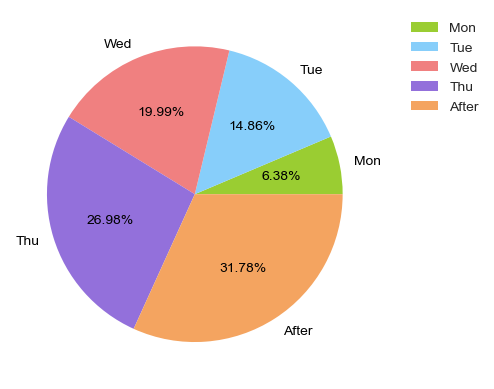

In [9]:
names = ['Mon', 'Tue', 'Wed', 'Thu', 'After']
sizes = [210, 489, 658, 888, after]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral', 'mediumpurple', 'sandybrown']

plt.pie(sizes,labels = names, colors = colors, autopct = "%1.2f%%")
plt.style.use('seaborn')
plt.grid(visible=True, axis='both')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()